In [1]:
# importing the important libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('darkgrid')
%matplotlib inline

In [26]:
df = pd.read_csv(r"C:\Users\91832\Downloads\age_gender.csv\age_gender.csv")
df=df.drop("ethnicity",axis=1)

In [27]:
df.head()

,age,gender,img_name,pixels
0,1,0,20161219203650636.jpg.chip.jpg,129 128 128 126 127 130 133 135 139 142 145 14...
1,1,0,20161219222752047.jpg.chip.jpg,164 74 111 168 169 171 175 182 184 188 193 199...
2,1,0,20161219222832191.jpg.chip.jpg,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,1,0,20161220144911423.jpg.chip.jpg,193 197 198 200 199 200 202 203 204 205 208 21...
4,1,0,20161220144914327.jpg.chip.jpg,202 205 209 210 209 209 210 211 212 214 218 21...


In [5]:
df.info()
#check dataframe shape
df.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23705 entries, 0 to 23704
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       23705 non-null  int64 
 1   gender    23705 non-null  int64 
 2   img_name  23705 non-null  object
 3   pixels    23705 non-null  object
dtypes: int64(2), object(2)
memory usage: 740.9+ KB


(23705, 4)

In [7]:
#check if there are dublicated records
df.duplicated()
df.duplicated().sum()


0

In [6]:
print(df["age"].value_counts())
print(df["gender"].value_counts())

26     2197
1      1123
28      918
35      880
24      859
       ... 
115       3
101       2
91        2
111       1
103       1
Name: age, Length: 104, dtype: int64
0    12391
1    11314
Name: gender, dtype: int64


<AxesSubplot:>

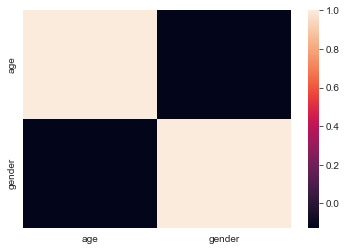

In [7]:
#checking for correlation 
corr = df.corr()
sns.heatmap(corr)
#no correlation

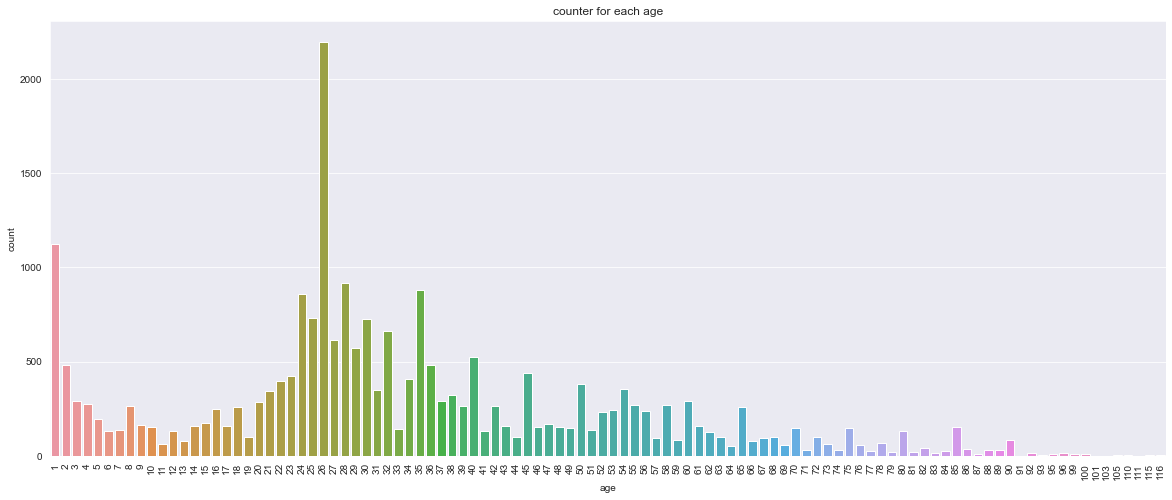

In [9]:
plt.figure(figsize=(20,8))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.age)
ax.set_title("counter for each age")
plt.show()

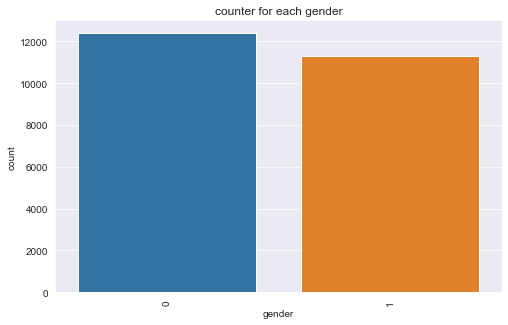

In [10]:
plt.figure(figsize=(8,5))
plt.xticks(rotation=90)
ax = sns.countplot(x=df.gender)
ax.set_title("counter for each gender")
plt.show()

In [4]:
from sklearn.metrics import confusion_matrix
import itertools
import tensorflow as tf
import plotly.express as px
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import to_categorical # convert to one-hot-encoding
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D, BatchNormalization, InputLayer
from tensorflow.keras.optimizers import RMSprop,Adam
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.callbacks import ReduceLROnPlateau, EarlyStopping
from tensorflow.keras.losses import BinaryCrossentropy, SparseCategoricalCrossentropy

In [28]:
columns = ["age","gender"]
y = df.drop(["pixels","img_name"], axis = 1)
x = df.drop(["age","gender",'img_name'], axis = 1)

In [29]:
y.head()

,age,gender
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [30]:
x

,pixels
0,129 128 128 126 127 130 133 135 139 142 145 14...
1,164 74 111 168 169 171 175 182 184 188 193 199...
2,67 70 71 70 69 67 70 79 90 103 116 132 145 155...
3,193 197 198 200 199 200 202 203 204 205 208 21...
4,202 205 209 210 209 209 210 211 212 214 218 21...
...,...
23700,127 100 94 81 77 77 74 99 102 98 128 145 160 1...
23701,23 28 32 35 42 47 68 85 98 103 113 117 130 129...
23702,59 50 37 40 34 19 30 101 156 170 177 184 187 1...
23703,45 108 120 156 206 197 140 180 191 199 204 207...


In [31]:
num_pixels = len(x['pixels'][0].split(" "))
img_height = int(np.sqrt(len(x['pixels'][0].split(" "))))
img_width = int(np.sqrt(len(x['pixels'][0].split(" "))))
print(num_pixels, img_height, img_width)

2304 48 48


In [10]:
x = pd.Series(x["pixels"])
x = x.apply(lambda x: x.split(' '))
x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))
x = np.array(x)
x = np.stack(np.array(x), axis=0)
x = np.reshape(x, (-1, 48, 48))

# reshape data
x = x.reshape(-1,48,48,1)

C:\Users\91832\AppData\Local\Temp/ipykernel_72344/3119434224.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  x = x.apply(lambda x: np.array(list(map(lambda z: np.int(z), x))))


In [26]:
age_matrix = np.array(y["age"]) 
gender_matrix = np.array(y["gender"])
age = to_categorical(age_matrix)
gender = to_categorical(y["gender"])
print(age, gender)

[[0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 [0. 1. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]] [[1. 0.]
 [1. 0.]
 [1. 0.]
 ...
 [0. 1.]
 [0. 1.]
 [0. 1.]]


In [27]:
x = x / 255.0


In [28]:
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.1, # Randomly zoom image 10%
        width_shift_range=0.1,  # randomly shift images horizontally 10%
        height_shift_range=0.1,  # randomly shift images vertically 10%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(x)

In [29]:
from sklearn.model_selection import train_test_split
X_train_gender, X_test_gender, y_train_gender, y_test_gender = train_test_split(x, gender, test_size= 0.3)
X_train_age, X_test_age, y_train_age, y_test_age = train_test_split(x, age, test_size= 0.3)

In [50]:
def my_model(num_classes, activation, loss):
    model = Sequential() 
    model.add(Conv2D(32, kernel_size=(3, 3), activation='relu', padding = "same", input_shape=(48,48,1)))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(MaxPool2D(pool_size=(3,3)))
    model.add(Conv2D(64, kernel_size=(3, 3), activation='relu', padding = "same"))
    model.add(MaxPool2D(pool_size=(2, 2)))
    model.add(Flatten())
    model.add(Dense(256, activation='relu'))
    model.add(Dense(num_classes, activation= activation))
    model.compile(optimizer='Adam',
              loss= loss,
              metrics=['accuracy'])
    return model

In [51]:
early_stopping = EarlyStopping(patience=10, min_delta=0.0001,restore_best_weights=True)

learning_rate_reduction = ReduceLROnPlateau(monitor='val_acc', patience=3, verbose=1, 
                                            factor=0.5, min_lr=0.00001)

In [52]:
model_gender = my_model(2, "sigmoid", "binary_crossentropy")
history_gender = model_gender.fit(X_train_gender, y_train_gender, batch_size=64,
                              epochs = 20, validation_data = (X_test_gender,y_test_gender), steps_per_epoch= X_train_gender.shape[0] // 64, callbacks= [early_stopping, learning_rate_reduction])

Epoch 1/20
259/259 [==============================] - 73s 275ms/step - loss: 0.6937 - accuracy: 0.5152 - val_loss: 0.6919 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 2/20
259/259 [==============================] - 67s 260ms/step - loss: 0.6925 - accuracy: 0.5207 - val_loss: 0.6917 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 3/20
259/259 [==============================] - 66s 255ms/step - loss: 0.6927 - accuracy: 0.5193 - val_loss: 0.6968 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 4/20
259/259 [==============================] - 67s 260ms/step - loss: 0.6924 - accuracy: 0.5210 - val_loss: 0.7290 - val_accuracy: 0.4729 - lr: 0.0010
Epoch 5/20
259/259 [==============================] - 69s 266ms/step - loss: 0.6923 - accuracy: 0.5212 - val_loss: 0.6921 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 6/20
259/259 [==============================] - 67s 258ms/step - loss: 0.6924 - accuracy: 0.5205 - val_loss: 0.6918 - val_accuracy: 0.5271 - lr: 0.0010
Epoch 7/20
259/259 [==============================] 

In [ ]:
from keras.models import load_model

model_gender.save('modelgender5.model')

In [ ]:
from keras.models import load_model

model_age.save('modelage5.model')

In [20]:
import numpy as np
import pandas as pd
from pathlib import Path
import os.path

from sklearn.model_selection import train_test_split

import tensorflow as tf

from sklearn.metrics import r2_score


In [21]:
image_dir = Path(r"C:\Users\91832\Downloads\20-50\20-50")
filepaths = pd.Series(list(image_dir.glob(r'**/*.jpg')), name='Filepath').astype(str)
ages = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(np.int)

images = pd.concat([filepaths, ages], axis=1).sample(frac=1.0, random_state=1).reset_index(drop=True)

C:\Users\91832\AppData\Local\Temp/ipykernel_15256/3366927739.py:3: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  ages = pd.Series(filepaths.apply(lambda x: os.path.split(os.path.split(x)[0])[1]), name='Age').astype(np.int)


In [22]:
images

,Filepath,Age
0,C:\Users\91832\Downloads\20-50\20-50\test\33\4...,33
1,C:\Users\91832\Downloads\20-50\20-50\train\30\...,30
2,C:\Users\91832\Downloads\20-50\20-50\train\40\...,40
3,C:\Users\91832\Downloads\20-50\20-50\train\32\...,32
4,C:\Users\91832\Downloads\20-50\20-50\train\22\...,22
...,...,...
40435,C:\Users\91832\Downloads\20-50\20-50\train\20\...,20
40436,C:\Users\91832\Downloads\20-50\20-50\train\43\...,43
40437,C:\Users\91832\Downloads\20-50\20-50\test\42\3...,42
40438,C:\Users\91832\Downloads\20-50\20-50\train\24\...,24


In [32]:
# Let's only use 5000 images to speed up training time
image_df = images.sample(40000, random_state=1).reset_index(drop=True)

train_df, test_df = train_test_split(image_df, train_size=0.7, shuffle=True, random_state=1)

In [33]:
train_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    validation_split=0.2
)

test_generator = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255
)

In [34]:
train_df

,Filepath,Age
8224,C:\Users\91832\Downloads\20-50\20-50\test\22\3...,22
11219,C:\Users\91832\Downloads\20-50\20-50\train\49\...,49
17353,C:\Users\91832\Downloads\20-50\20-50\train\41\...,41
15305,C:\Users\91832\Downloads\20-50\20-50\train\32\...,32
30147,C:\Users\91832\Downloads\20-50\20-50\train\47\...,47
...,...,...
7813,C:\Users\91832\Downloads\20-50\20-50\train\50\...,50
32511,C:\Users\91832\Downloads\20-50\20-50\train\50\...,50
5192,C:\Users\91832\Downloads\20-50\20-50\train\31\...,31
12172,C:\Users\91832\Downloads\20-50\20-50\train\30\...,30


In [35]:
train_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Age',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='training'
)

val_images = train_generator.flow_from_dataframe(
    dataframe=train_df,
    x_col='Filepath',
    y_col='Age',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=True,
    seed=42,
    subset='validation'
)

test_images = test_generator.flow_from_dataframe(
    dataframe=test_df,
    x_col='Filepath',
    y_col='Age',
    target_size=(120, 120),
    color_mode='rgb',
    class_mode='raw',
    batch_size=32,
    shuffle=False
)

Found 22400 validated image filenames.
Found 5600 validated image filenames.
Found 12000 validated image filenames.


In [36]:
inputs = tf.keras.Input(shape=(120, 120, 3))
x = tf.keras.layers.Conv2D(filters=16, kernel_size=(3, 3), activation='relu')(inputs)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu')(x)
x = tf.keras.layers.MaxPool2D()(x)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
x = tf.keras.layers.Dense(64, activation='relu')(x)
outputs = tf.keras.layers.Dense(1, activation='linear')(x)

model = tf.keras.Model(inputs=inputs, outputs=outputs)

model.compile(
    optimizer='adam',
    loss='mse'
)

history = model.fit(
    train_images,
    validation_data=val_images,
    epochs=70,
    callbacks=[
        tf.keras.callbacks.EarlyStopping(
            monitor='val_loss',
            patience=5,
            restore_best_weights=True
        )
    ]
)

Epoch 1/70
700/700 [==============================] - 134s 191ms/step - loss: 144.5019 - val_loss: 80.6823
Epoch 2/70
700/700 [==============================] - 103s 147ms/step - loss: 82.7811 - val_loss: 80.5485
Epoch 3/70
700/700 [==============================] - 105s 150ms/step - loss: 82.2030 - val_loss: 86.8280
Epoch 4/70
700/700 [==============================] - 103s 147ms/step - loss: 81.9612 - val_loss: 81.1217
Epoch 5/70
700/700 [==============================] - 103s 147ms/step - loss: 81.7397 - val_loss: 80.7220
Epoch 6/70
700/700 [==============================] - 104s 148ms/step - loss: 81.8220 - val_loss: 80.1702
Epoch 7/70
700/700 [==============================] - 103s 148ms/step - loss: 81.7474 - val_loss: 80.2557
Epoch 8/70
700/700 [==============================] - 103s 147ms/step - loss: 81.3240 - val_loss: 81.2318
Epoch 9/70
700/700 [==============================] - 104s 149ms/step - loss: 82.0222 - val_loss: 80.2801
Epoch 10/70
700/700 [========================

In [42]:
predicted_ages = np.squeeze(model.predict(test_images))
true_ages = test_images.labels

rmse = np.sqrt(model.evaluate(test_images, verbose=0))
print("     Test RMSE: {:.5f}".format(rmse))

r2 = r2_score(true_ages, predicted_ages)
print("Test R^2 Score: {:.5f}".format(r2))

     Test RMSE: 8.90826
Test R^2 Score: 0.00565


In [43]:
null_rmse = np.sqrt(np.sum((true_ages - np.mean(true_ages))**2) / len(true_ages))
print("Null/Baseline Model Test RMSE: {:.5f}".format(null_rmse))

Null/Baseline Model Test RMSE: 8.93351


In [44]:
from keras.models import load_model

model.save('modelage35.model')

INFO:tensorflow:Assets written to: modelage35.model\assets
